**Yulu** is India’s leading micro-mobility service provider, which offers unique vehicles for the daily
commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the
safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable
commuting.

**Yulu zones** are located at all the appropriate locations (including metro stations, bus stands, office
spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable,
and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting
company to understand the factors on which the demand for these shared electric cycles depends.
Specifically, they want to understand the factors affecting the demand for these shared electric
cycles in the Indian market.

# Task List
* Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset
* Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)
* Select an appropriate test to check whether:
    * Working Day has effect on number of electric cycles rented
    * No. of cycles rented similar or different in different seasons
    * No. of cycles rented similar or different in different weather
    * Weather is dependent on season (check between 2 predictor variable)
* Set up Null Hypothesis (H0)
* State the alternate hypothesis (H1)
* Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
* Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary
* Set a significance level (alpha)
* Calculate test Statistics.
* Decision to accept or reject null hypothesis.
* Inference from the analysis

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, f_oneway, chisquare, chi2_contingency
from scipy.stats import shapiro # Shapiro-Wilk’s test for Normality
from scipy.stats import levene # Levene's test for Equality of Variance
from scipy.stats import kruskal

In [174]:
df = pd.read_csv("C:/DSML Practice DataSet/Yulu_bike.txt")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [123]:
# Checking for null values -
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [124]:
# Checking for duplicate rows -
df.duplicated().sum()

0

In [125]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [10]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [27]:
def all_values(data, col_name):
    print("Unique Values: ", data[col_name].unique())
    print("Value Count: ")
    print(data[col_name].value_counts())

list_of_col = ['workingday', 'holiday', 'season', 'weather']
for i in list_of_col:
    print(i, "==")
    all_values(df, i)
    print()

workingday ==
Unique Values:  [0 1]
Value Count: 
1    7412
0    3474
Name: workingday, dtype: int64

holiday ==
Unique Values:  [0 1]
Value Count: 
0    10575
1      311
Name: holiday, dtype: int64

season ==
Unique Values:  [1 2 3 4]
Value Count: 
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

weather ==
Unique Values:  [1 2 3 4]
Value Count: 
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64



<AxesSubplot:>

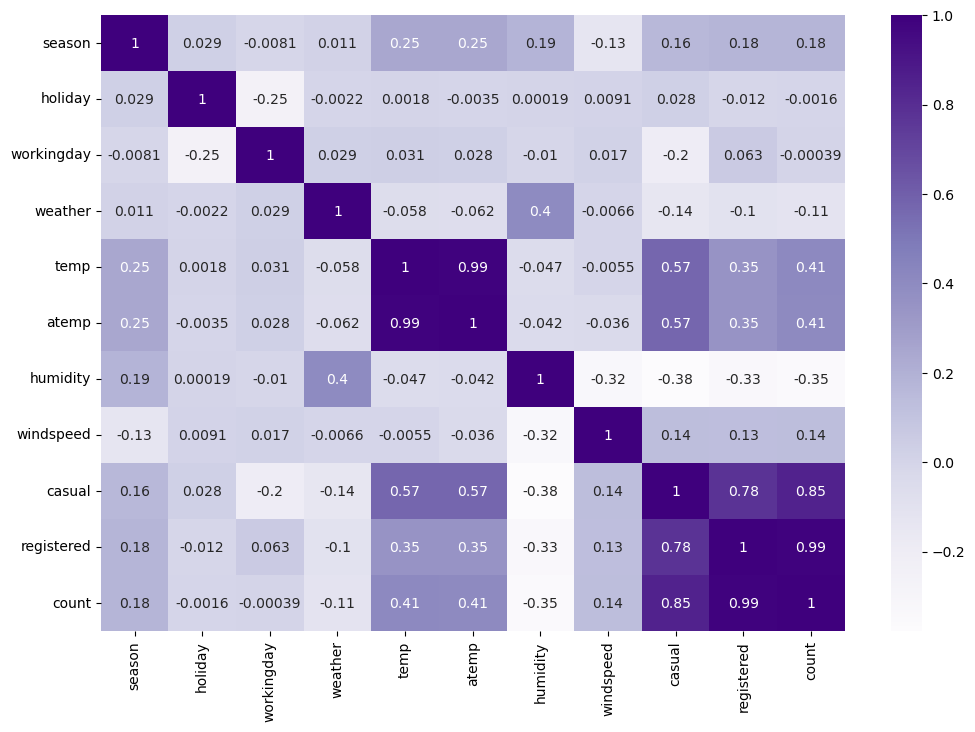

In [11]:
plt.figure(figsize=[12,8])
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='Purples')

From the correlation analysis, we can draw some meaningful insights:

__Feeling Temperature and Apparent Temperature:__ Feeling temperature and apparent temperature are highly correlated, as they usually have a very small difference between them. This suggests that the two variables are closely related and may provide redundant information in some cases.

**Count, Causal, and Registered:** The variables count, causal, and registered are all highly correlated with each other. This indicates a strong relationship between them, likely because they collectively contribute to the total bike rentals

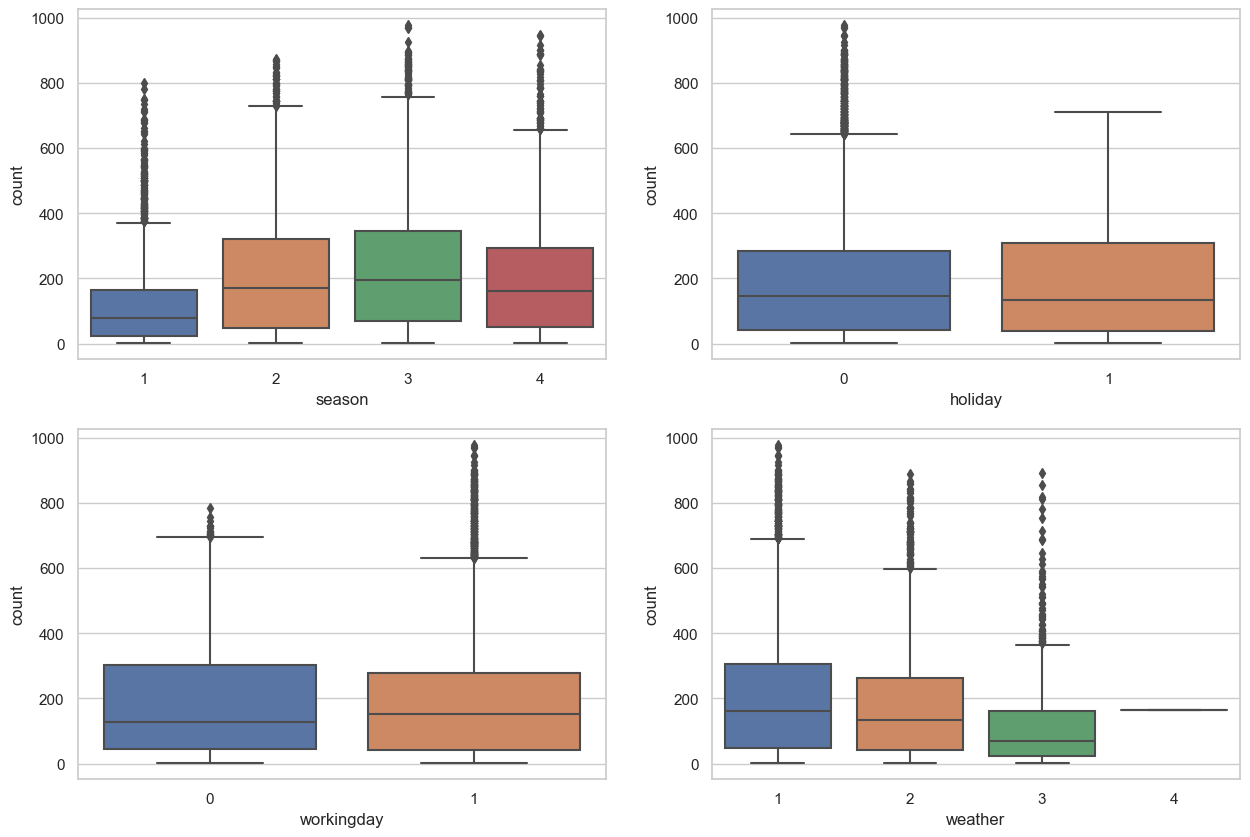

In [26]:
# Outlier Detection using Boxplots -

fig, axes = plt.subplots(2, 2, figsize=(15,10))
sns.boxplot(data=df, x='season', y= 'count', ax=axes[0,0])
sns.boxplot(data=df, x='holiday', y= 'count', ax=axes[0,1])
sns.boxplot(data=df, x='workingday', y= 'count', ax=axes[1,0])
sns.boxplot(data=df, x='weather', y= 'count', ax=axes[1,1])
plt.show()

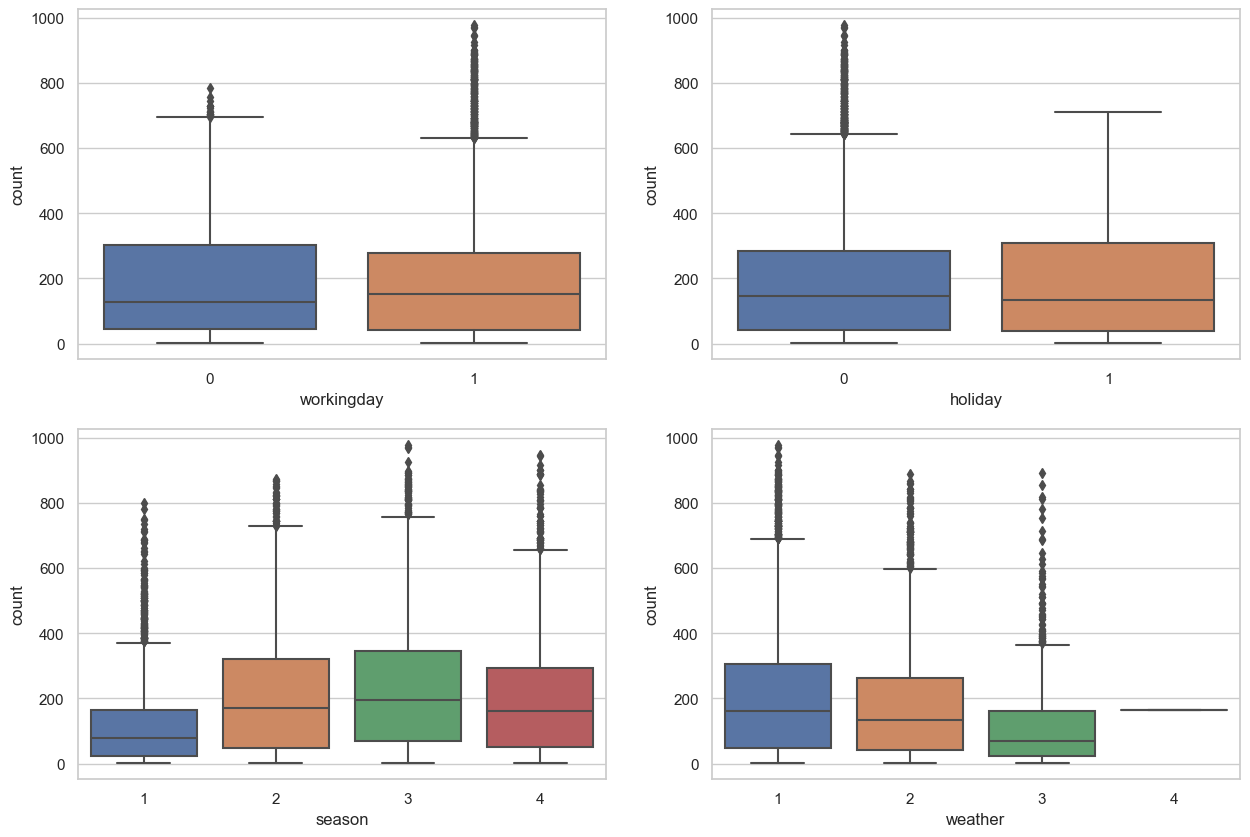

In [29]:
# Just trying another way for Boxplots -

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
sns.set(style="whitegrid")

for i, col in enumerate(list_of_col):
    sns.boxplot(data=df, x=col, y='count', ax=axes[i])

plt.show()

In [175]:
# Dropping highly correlated columns -
dfn = df.drop(columns=['casual', 'registered', 'atemp'])

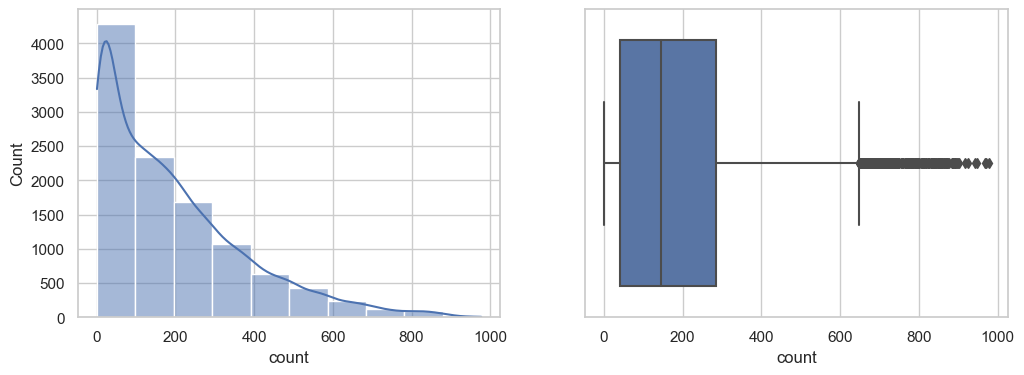

In [48]:
# Checking the distribution of 'count' column
plt.figure(figsize=(12,4))

# Histogram
plt.subplot(1,2,1)
sns.histplot(dfn['count'], bins=10, kde=True)

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x = dfn['count'])
plt.show()

We can see that outliers are present in the given columns. We need to figure out a way to deal with them before starting with the tests.
We have multiple options available on how to proceed with these outlier values.

1. Try to understand if these values make any sense according to the business problem. If yes, then we can keep them as it is.
2. In case these outliers are some invalid values which do not make much sense, we can remove them using the IQR.
3. Or we can apply a log transformation on the data to reduce the effect of these outliers.




### 1)
* The outliers in the given data set are the no. of bike rides per session/day. These values could sometimes be higher than expected due to increase in the crowd on certain days/occasions. 
* These data values are important for capturing variations in the data. Hence, in this case, the ideal approach of dealing with outliers would be to leave them as it is. 
* But since the tests that we are going to be applied, are based on the assumption that the dataset is normal or near normal, we will drop those outlier values using the IQR method

### 2)
### Let's try transforming the data into normal distribution with log transformation

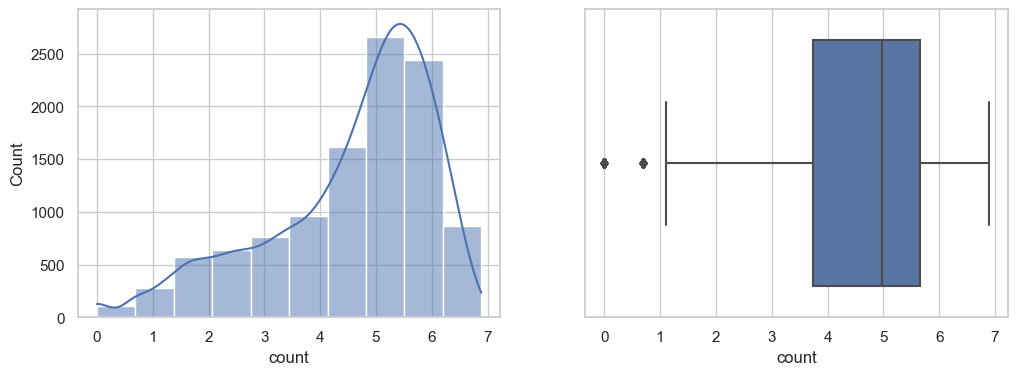

In [50]:
# Checking distribution after applying log transformation -
plt.figure(figsize=(12,4))

# Histogram
plt.subplot(1,2,1)
sns.histplot(np.log(dfn['count']), bins=10, kde=True)

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x = np.log(dfn['count']))
plt.show()

### 3) 
### Outlier Treatment using IQR

In [177]:
# Outlier Treatment using IQR (not needed but, we can do it) -

q1 = dfn['count'].quantile(0.25)
q3 = dfn['count'].quantile(0.75)
iqr = q3-q1

dfn = dfn[(dfn['count']>(q1-1.5*iqr) ) & (dfn['count']<(q3+1.5*iqr))]

print("No. of rows : ", dfn.shape[0])

No. of rows :  10583


## Aggregating the total no. of bike rides(count) based on the aforementioned columns ['workingday', 'holiday', 'season', 'weather']

In [178]:
# WORKINGDAY
pd.DataFrame(dfn.groupby('workingday')['count'].describe())

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3422.0,180.965517,163.782166,1.0,43.0,124.0,295.75,645.0
1,7161.0,173.011591,152.358993,1.0,38.0,143.0,262.00,646.0


In [63]:
# HOLIDAY
data = dfn[['holiday', 'count']]
data.groupby('holiday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10274.0,175.372786,155.950275,1.0,40.0,138.0,269.0,646.0
1,309.0,182.588997,163.766590,1.0,38.0,127.0,304.0,597.0


In [65]:
# SEASON
dfn.groupby('season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2670.0,112.795131,116.884929,1.0,24.00,78.0,161.00,644.0
2,2633.0,195.653627,166.170802,1.0,45.00,165.0,299.00,646.0
3,2616.0,210.484327,164.055532,1.0,59.75,185.0,323.25,646.0
4,2664.0,184.404655,154.563069,1.0,48.75,154.0,276.25,646.0


In [67]:
# WEATHER
dfn.groupby('weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6962.0,187.131140,161.333785,1.0,45.0,153.0,286.0,646.0
2,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0
3,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


# Q-1: Is there a significant difference between the demand of bikes on weekday and weekend?

#### **Step 1:** Defining the null and alternate hypothesis

$H_0:$ The demand of bikes on weekdays is similar to the demand of bikes on weekend.

$H_a:$ The demand of bikes on weekdays is less than the demand of bikes on weekend.

Let $\mu_1$ and $\mu_2$ be the average no. of bikes rented on weekdays and weekends respectively.

Mathematically, the above formulated hypothesis can be written as:

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 < \mu_2$


**NOTE:**
* A t-test looks at two sets of data that are different from each other, with no standard deviation or variance.

* A z-test views the averages of data sets that are different from each other but have the standard deviation or variance given.

* The t test as compared with z test has its advantage for small sample comparison. As n increases, t approaches to z. The advantage of t test disappears, and t distribution simply becomes z distribution. 

* In other words, with large n, t test is just close to z test and one doen't lose anything to continue to use t test. 

* In the past, for convenience, we use z table when n > 30.  We don't have to do it anymore. 

* In fact, all statistical packages use t test even n is large. This is easy, convenience with computer programming, and is correct. All statistical packages are good references.

### Step 2: Choosing an appropriate test
**Note** that syandard deviation of the population is not known

In [70]:
weekday = dfn[dfn['workingday']==1]['count'].sample(3000)
weekend = dfn[dfn['workingday']==0]['count'].sample(3000)

## Taking same no. of samples as we know that unequal sample sizes and variances dramatically affect the statistical power of a test

In [72]:
print('Weekday sample std dev: ', round(weekday.std(), 2))
print('Weekend sample std dev: ', round(weekend.std(), 2))

Weekday sample std dev:  151.64
Weekend sample std dev:  164.25


As the sample standard deviations are different, the population standard deviations can be assumed to be different.

This is a one-tailed test concerning two population means from two independent populations. As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

#### **Step 3:** Deciding the significance level

Assuming the significance level of 5% (α = 0.05).

In [73]:
alpha = 0.05

### Finding out the P_value

In [81]:
t_stat, p_value = ttest_ind(weekday, weekend, alternative = 'less')
if p_value < alpha:
    print(f"p_value: {p_value} < alpha: {alpha}, we reject H0")
else:
    print(f"p_value: {p_value} > alpha: {alpha}, we stick with the H0")

p_value: 0.011203100994408287 < alpha: 0.05, we reject H0


### **Observation:** 
#### Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the average no. of bike rides during weekdays is less than those on weekends.

# Q-2: Is there a significant difference between the demand of bikes on holidays and regular-days?

#### **Step 1:** Defining the null and alternate hypothesis

$H_0:$ The demand of bikes on holidays is similar to the demand of bikes on regular-days.

$H_a:$ The demand of bikes on holidays is greater than the demand of bikes on regular-days.

Let $\mu_1$ and $\mu_2$ be the average no. of bikes rented on both the occasions respectively.

Mathematically, the above formulated hypothesis can be written as:

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 > \mu_2$

In [82]:
holiday = dfn[dfn['holiday']==1]['count'].sample(301)
regular_day = dfn[dfn['holiday']==0]['count'].sample(301)

In [83]:
print('holiday sample std dev: ', round(holiday.std(), 2))
print('regular_day sample std dev: ', round(regular_day.std(), 2))

holiday sample std dev:  163.77
regular_day sample std dev:  155.45


In [84]:
t_stat, p_value = ttest_ind(holiday, regular_day, alternative = 'greater')
if p_value < alpha:
    print(f"p_value: {p_value} < alpha: {alpha}, we reject H0")
else:
    print(f"p_value: {p_value} > alpha: {alpha}, we stick with the H0")

p_value: 0.28340464507747964 > alpha: 0.05, we stick with the H0


### **Observation:**
#### Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the average no. of bike rides during regular days is equal to those on holidays.

# Ques. 3 - Is the demand of bicycles on rent same for different weather conditions?


#### ** Define the null and alternate hypothesis

$H_0:$ The average no. of bike rides in different weather conditions  are equal.

$H_a:$ The average no. of bike rides in different weather conditions are not equal.

Let $\mu_1$ and $\mu_2$ be the average no. of bikes rented on weekdays and weekends respectively.

In [85]:
# droping the weather= 4, as there is only 1 value in the dataset
dfn = dfn[~(dfn['weather']==4)]

In [86]:
# WEATHER
dfn.groupby('weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6962.0,187.131140,161.333785,1.0,45.0,153.0,286.0,646.0
2,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0
3,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0


In [87]:
w1 = dfn[dfn['weather']==1]['count'].sample(799)
w2 = dfn[dfn['weather']==2]['count'].sample(799)
w3 = dfn[dfn['weather']==3]['count'].sample(799)

This is a problem, concerning three independent population means. **One-way ANOVA** could be the appropriate test here provided normality and equality of variance assumptions are verified.

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

* The samples are independent.
* Each sample is from a normally distributed population.
* The population variance of the groups are all equal. 

Now, we will be using the following statistical tests to check the normality and eqality of variance of the data set -

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

In [97]:
# Defining a function for comparing p_value with alpha, to use it further ahead
def p_value_check(p_value, alpha):
    if p_value < alpha:
        print(f"p_value: {p_value} < alpha: {alpha}, we reject null hypothesis")
    else:
        print(f"p_value: {p_value} > alpha: {alpha}, we stick with the null hypothesis")

In [98]:
# Assumption 1: Normality - Shapiro Test

# H0 : Count follows normal distribution
# Ha : It does not

w_stat, p_value = shapiro(dfn['count'].sample(5000))
p_value_check(p_value, alpha)

p_value: 0.0 < alpha: 0.05, we reject null hypothesis


## The count is not normally distributed which means that it fails the assumptions of ANOVA for normality

In [102]:
# Assumotion 2: Homogeneity of Variance - Levene Test

# H0: Variences of count for all 3 weathers are same
# Ha: They are not same

stat, p_value= levene(w1, w2, w3)
p_value_check(p_value, alpha)

p_value: 1.1306051417519638e-18 < alpha: 0.05, we reject null hypothesis


In [129]:
print(w1.var(), w2.var(), w3.var())

24147.964906007182 20205.501836568896 14880.631412699488


## Even the variences are not same. It may be suitable to use Kruskal test

### Central Limit Theorem -

* According to this theorem, the distribution of sample means approximates a normal distribution as the sample size gets larger, regardless of the population's distribution. 

* In other words, if we find the mean of a large number of independent random variables, the mean
will follow a normal distribution, irrespective of the distribution of the original variables.

* In practice, sample sizes equal to or greater than 30-40 are often considered sufficient for the CLT to hold.

Hence, the sample size being large enough, we don't need to worry about the non-normality of distribution of the data set in hand before applying the tests.

Eventually, as the sample size gets larger, the distribution of sample means will fall into a normal or near normal shape.

### Hence we can use eaither of the 2 tests i.e. ANOVA or Kruskal-Wallis H-Test


In [133]:
h_statistic, p_value = kruskal(w1, w2, w3)
p_value_check(p_value, alpha)

p_value: 8.951769692680233e-27 < alpha: 0.05, we reject null hypothesis


In [132]:
test_stat, p_value = f_oneway(w1, w2, w3)
p_value_check(p_value, alpha)

p_value: 2.9096709656064937e-27 < alpha: 0.05, we reject null hypothesis


**Observation:** Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the average no. of bike rides in different weather conditions are not equal.

# Ques. 4 - Is the demand of bicycles on rent same for different seasons?
---

#### **Step 1:** Defining the null and alternate hypothesis

$H_0:$ The average no. of bike rides in different seasons  are equal.

$H_a:$ The average no. of bike rides in different seasons are not equal.

In [134]:
s1 = dfn[dfn['season'] == 1]['count'].sample(2500)
s2 = dfn[dfn['season'] == 2]['count'].sample(2500)
s3 = dfn[dfn['season'] == 3]['count'].sample(2500)
s4 = dfn[dfn['season'] == 3]['count'].sample(2500)

In [135]:
dfn.groupby(['season'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2669.0,112.775946,116.902627,1.0,24.00,78.0,161.00,644.0
2,2633.0,195.653627,166.170802,1.0,45.00,165.0,299.00,646.0
3,2616.0,210.484327,164.055532,1.0,59.75,185.0,323.25,646.0
4,2664.0,184.404655,154.563069,1.0,48.75,154.0,276.25,646.0


#### AS We have already performed tests for normality and homogeneity of variance. So we will be directly moving onto the One-way ANOVA test/Kruskal test

In [136]:
test_stat, p_value = f_oneway(s1, s2, s3, s4)
p_value_check(p_value, alpha)

p_value: 1.30476108356306e-144 < alpha: 0.05, we reject null hypothesis


In [137]:
h_statistic, p_value = kruskal(s1, s2, s3, s4)
p_value_check(p_value, alpha)

p_value: 1.388446123241738e-143 < alpha: 0.05, we reject null hypothesis


**Observation:** Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the average no. of bike rides in different seasons are not equal.

# Ques. 5 -  Are the weather conditions significantly different during different seasons? 

#### **Step 1:** Define the null and alternate hypothesis

$H_0:$ Weather conditions are independent of the season.

$H_a:$ Weather condition depends on the ongoing season

Although the data values in 'season' and 'weather' columns are numerical, they still represent different catgories. Hence, we will encode them accordingly before moving onto the tests.

In [146]:
weather_category = {1: 'sunny-pleasant',
                    2: 'cloudy-delightful',
                    3: 'rainy-drenching'}
dfn['weather_encoded'] = dfn['weather'].map(weather_category)

In [147]:
season_category = {1: 'spring',
                   2: 'summer', 
                   3: 'fall', 
                   4: 'winter'}
dfn['season_encoded'] = dfn['season'].map(season_category)

In [169]:
contingency_table = pd.crosstab(dfn.season_encoded, dfn.weather_encoded)
contingency_table

weather_encoded,cloudy-delightful,rainy-drenching,sunny-pleasant
season_encoded,,,
fall,604,199,1930
spring,715,211,1759
summer,708,224,1801
winter,807,225,1702


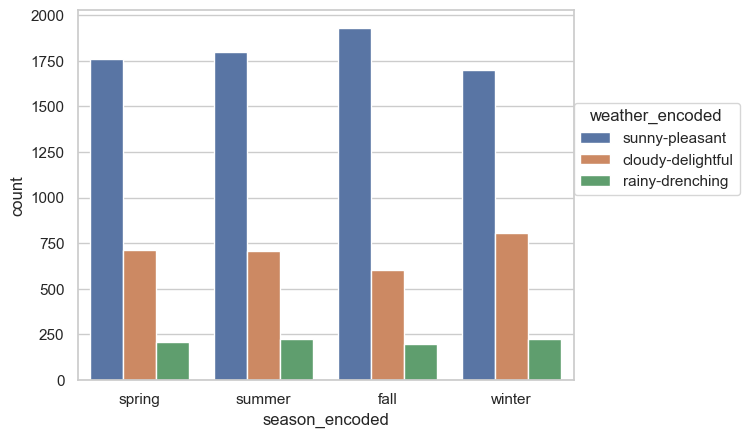

In [161]:
sns.countplot(x=dfn['season_encoded'], hue = dfn['weather_encoded'])

plt.legend(title= 'weather_encoded', loc=(1.0,0.5))

In [173]:
p_value = chi2_contingency(contingency_table)[1]

p_value_check(p_value, alpha)

p_value: 2.826001450992924e-08 < alpha: 0.05, we reject null hypothesis


### **Observation:** 
Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the weather conditions are dependent on the ongoing season.

# Insights and Recommendations

#### **EDA based insights -**

1. Total 10,886 rows were present in the data set.
2. Neither missing values, nor duplicate rows were found.
3. 'temp' and 'atemp' columns were found to be highly correlated. </br> Dropping one of them (atemp) to avoid multicollinearity.
4. 'count', 'casual' and 'registered' columns were highly correlated. </br> Dropping casual & registered columns to avoid multicollinearity.
5. Outlier values were found in the 'count' column.

#### **Insights from hypothesis testing -**
1. The no. of bikes rented on weekdays is comparatively lower than on weekends.
2. The no. of bikes rented on regular days is equal to those on holidays.
2. The demand of bicycles on rent differs under different weather conditions.
3. The demand of bicycles on rent is different during different seasons.
4. The weather conditions are surely dependent upon the ongoing season. 

#### **Miscellaneous observations -**
The distribution of 'count' column wasn't actually normal or near normal. </br> Infact the column's distribution is found to be a bit skewed towards right. 

#### **Generic recommendations -**

* **Promotional Strategies:** To increase weekday bike rentals, consider implementing targeted marketing campaigns or promotional offers to attract more customers during weekdays.

* **Holiday Specials:** Create special offers or events during holidays to encourage more bike rentals and attract holiday-goers.

* **Weather-based Marketing:** Tailor marketing efforts and offers based on weather conditions. For example, promote bike rentals on sunny days and offer indoor activities or discounts on rainy days.

* **Seasonal Rental Packages:** Offer seasonal rental packages or discounts to attract more customers during specific seasons when bike rentals are in higher demand.

* **Weather Gear Rentals:** Consider offering weather gear rentals like umbrellas or raincoats during rainy seasons to cater to customers' needs and increase revenue.

We recommend the company to maintain the bike stocks accordingly. 

